In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime

from scipy import spatial
from numpy import array
from numpy import corrcoef
from scipy.spatial import distance

from sklearn.preprocessing import MinMaxScaler

def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

def measure(v1,v2):
    #return measure_correlation(v1,v2)
    return measure_correlation(v1,v2)

In [28]:
df = pd.DataFrame()
path = (os.path.abspath(".")) + "/../../../ds/supertrunfo/datasete/"
filename = "s6.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=";", dtype={
    'nome': str, 'ano': float, 'cap':float, 'power':float, 'vel':float,
    'l':float
   })


In [29]:
df.head(10)

,nome,ano,cap,power,vel,l
0,kafer,1948.0,1131.0,25.0,105.0,4070.0
1,passat_b1,1973.0,1297.0,55.0,150.0,4190.0
2,412_le_variant,1972.0,1679.0,80.0,155.0,4583.0
3,karmann_ghia_coupé_typ_14,1955.0,1191.0,30.0,115.0,4140.0
4,scirocco_1_typ,1974.0,1093.0,50.0,144.0,3855.0
5,polo_1_limousine,1975.0,895.0,40.0,124.0,3512.0
6,volkswagen_sp_2_1600,1974.0,1584.0,65.0,149.0,4217.0
7,jetta_1,1979.0,1093.0,50.0,142.0,4190.0
8,lupo,1998.0,997.0,50.0,152.0,3527.0
9,fridolin_service_bus_typ,1964.0,1191.0,34.0,100.0,3970.0


In [30]:
df.columns

Index(['nome', 'ano', 'cap', 'power', 'vel', 'l'], dtype='object')

In [31]:
df.describe()

,ano,cap,power,vel,l
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1980.250000,1365.666667,72.166667,153.354167,4134.750000
std,18.531407,301.807694,41.134632,36.366635,334.782765
min,1948.000000,800.000000,25.000000,80.000000,3512.000000
25%,1971.250000,1121.500000,47.250000,128.750000,3949.500000
50%,1976.500000,1390.000000,60.000000,151.000000,4120.000000
75%,1995.750000,1616.000000,80.000000,172.500000,4381.250000
max,2013.000000,1798.000000,160.000000,225.000000,4799.000000


In [32]:
columns = ['nome','ano']
df.drop(columns, inplace=True, axis=1)
df.head(50)


,cap,power,vel,l
0,1131.0,25.0,105.0,4070.0
1,1297.0,55.0,150.0,4190.0
2,1679.0,80.0,155.0,4583.0
3,1191.0,30.0,115.0,4140.0
4,1093.0,50.0,144.0,3855.0
5,895.0,40.0,124.0,3512.0
6,1584.0,65.0,149.0,4217.0
7,1093.0,50.0,142.0,4190.0
8,997.0,50.0,152.0,3527.0
9,1191.0,34.0,100.0,3970.0


In [33]:
df.describe()

,cap,power,vel,l
count,24.000000,24.000000,24.000000,24.000000
mean,1365.666667,72.166667,153.354167,4134.750000
std,301.807694,41.134632,36.366635,334.782765
min,800.000000,25.000000,80.000000,3512.000000
25%,1121.500000,47.250000,128.750000,3949.500000
50%,1390.000000,60.000000,151.000000,4120.000000
75%,1616.000000,80.000000,172.500000,4381.250000
max,1798.000000,160.000000,225.000000,4799.000000


In [34]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [35]:
df

,cap,power,vel,l
0,0.331663,0.000000,0.172414,0.433566
1,0.497996,0.222222,0.482759,0.526807
2,0.880762,0.407407,0.517241,0.832168
3,0.391784,0.037037,0.241379,0.487956
4,0.293587,0.185185,0.441379,0.266511
5,0.095190,0.111111,0.303448,0.000000
6,0.785571,0.296296,0.475862,0.547786
7,0.293587,0.185185,0.427586,0.526807
8,0.197395,0.185185,0.496552,0.011655
9,0.391784,0.066667,0.137931,0.355866


            cap     power       vel         l
cap    1.000000  0.689640  0.571527  0.598418
power  0.689640  1.000000  0.899124  0.461273
vel    0.571527  0.899124  1.000000  0.375462
l      0.598418  0.461273  0.375462  1.000000


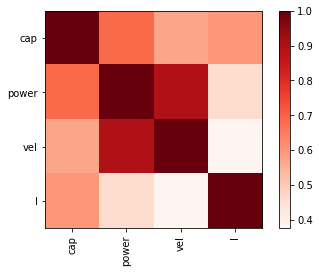

In [36]:
print(df.corr())
plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

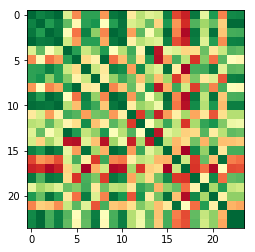

In [37]:
plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn)
plt.savefig('dataset6.pdf')
plt.show()

In [38]:
matriz_cor = df.T.corr()
print(matriz_cor)
dfm = pd.DataFrame(matriz_cor)
filename = "s6_matrix_corr_pearson2.csv"
dfm.to_csv(path+filename)



          0         1         2         3         4         5         6   \
0   1.000000  0.886968  0.934855  0.998204  0.178460 -0.491967  0.750724   
1   0.886968  1.000000  0.776452  0.912940  0.610407 -0.034327  0.754808   
2   0.934855  0.776452  1.000000  0.928072  0.021816 -0.563662  0.892260   
3   0.998204  0.912940  0.928072  1.000000  0.236068 -0.439191  0.764087   
4   0.178460  0.610407  0.021816  0.236068  1.000000  0.765690  0.260030   
5  -0.491967 -0.034327 -0.563662 -0.439191  0.765690  1.000000 -0.209853   
6   0.750724  0.754808  0.892260  0.764087  0.260030 -0.209853  1.000000   
7   0.745426  0.811222  0.464102  0.760518  0.508646 -0.076366  0.254374   
8  -0.459875  0.001073 -0.508874 -0.405859  0.778324  0.996265 -0.133052   
9   0.930775  0.768693  0.999919  0.923505  0.011516 -0.569563  0.892564   
10  0.975879  0.947074  0.935359  0.985313  0.334213 -0.328137  0.847817   
11 -0.120843  0.198260 -0.437339 -0.084918  0.699084  0.644756 -0.431136   
12  0.327547